# Credit Risk Analysis - Week 2 Mini Assignment

**Student**: Diwas Puri  
**Dataset**: Credit Risk Dataset  
**Algorithm**: Random Forest Classifier  

This analysis covers all Week 2 requirements:
1. Import Dataset
2. Inspect Data
3. Basic Filtering and Grouping
4. Machine Learning Algorithm Exploration
5. Visualization

#### Disclosure

Because of the author's lack of knowledge on Machine Learning algorithms, Claude Sonnet 4.0 was used to generate the relavent code snippets.

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Import Dataset

Loading the credit risk dataset containing loan applications and their default status.

In [2]:
# Load the dataset
df = pd.read_csv('data/credit_risk_dataset.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (32581, 12)
Columns: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


## 2. Inspect the Data

Understanding the structure, types, and basic statistics of our dataset.

In [3]:
# Display first 5 rows
print("First 5 rows:")
df.head()

First 5 rows:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Basic dataset information
print("Dataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

Summary Statisti

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
# Check for missing values and target distribution
print("Missing Values:")
missing_vals = df.isnull().sum()
print(missing_vals[missing_vals > 0])

print("\nTarget Variable (loan_status) Distribution:")
print(df['loan_status'].value_counts())
print(f"Default rate: {df['loan_status'].mean():.2%}")

Missing Values:
person_emp_length     895
loan_int_rate        3116
dtype: int64

Target Variable (loan_status) Distribution:
loan_status
0    25473
1     7108
Name: count, dtype: int64
Default rate: 21.82%


## 3. Basic Filtering and Grouping

Applying filters to extract meaningful subsets and using groupby for analysis.

In [6]:
# Filter 1: High-risk loans (interest rate > 15%)
high_risk_loans = df[df['loan_int_rate'] > 15]
print(f"High-risk loans (>15% interest): {len(high_risk_loans):,} ({len(high_risk_loans)/len(df):.1%})")
print(f"Default rate for high-risk loans: {high_risk_loans['loan_status'].mean():.2%}")

# Filter 2: Young borrowers (age < 25)
young_borrowers = df[df['person_age'] < 25]
print(f"\nYoung borrowers (<25): {len(young_borrowers):,} ({len(young_borrowers)/len(df):.1%})")
print(f"Default rate for young borrowers: {young_borrowers['loan_status'].mean():.2%}")

High-risk loans (>15% interest): 3,441 (10.6%)
Default rate for high-risk loans: 58.01%

Young borrowers (<25): 12,315 (37.8%)
Default rate for young borrowers: 23.22%


In [7]:
# Grouping analysis by loan grade
print("Analysis by Loan Grade:")
grade_analysis = df.groupby('loan_grade').agg({
    'loan_status': ['count', 'mean'],
    'loan_int_rate': 'mean',
    'loan_amnt': 'mean'
}).round(3)

grade_analysis.columns = ['Total_Loans', 'Default_Rate', 'Avg_Interest_Rate', 'Avg_Loan_Amount']
grade_analysis

Analysis by Loan Grade:


,Total_Loans,Default_Rate,Avg_Interest_Rate,Avg_Loan_Amount
loan_grade,,,,
A,10777,0.100,7.328,8539.273
B,10451,0.163,10.996,9995.484
C,6458,0.207,13.464,9213.863
D,3626,0.590,15.361,10849.242
E,964,0.644,17.009,12915.845
F,241,0.705,18.609,14717.324
G,64,0.984,20.252,17195.703


## 4. Visualization

Creating plots to visualize key patterns in the data.

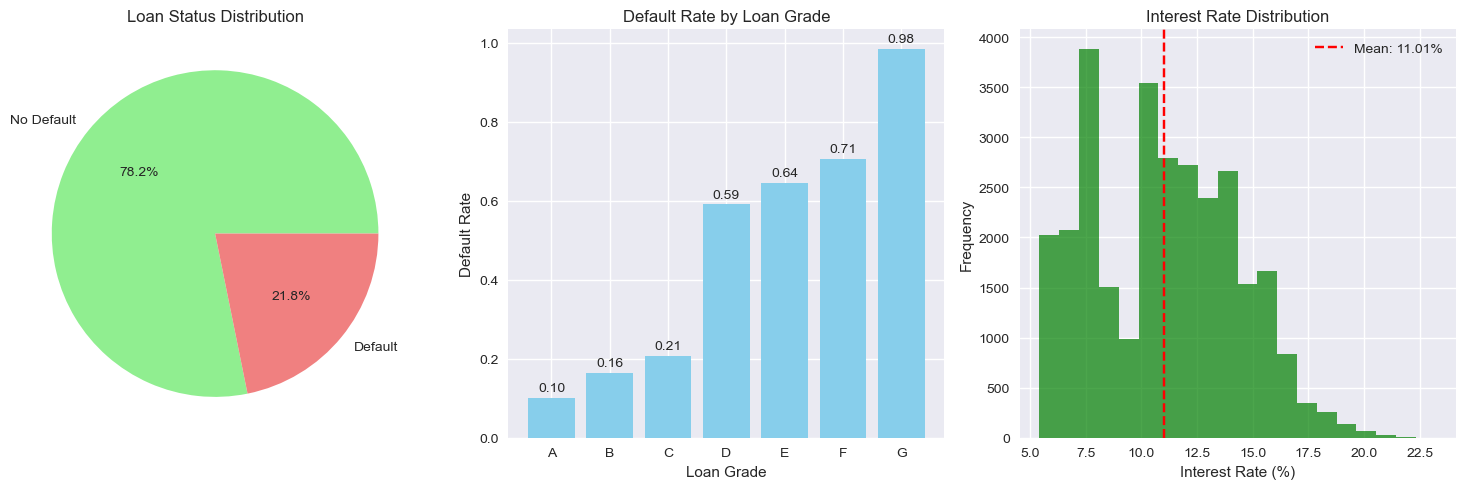

In [8]:
# Create visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Loan status distribution
plt.subplot(1, 3, 1)
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                     colors=['lightgreen', 'lightcoral'],
                                     labels=['No Default', 'Default'])
plt.title('Loan Status Distribution')
plt.ylabel('')

# Plot 2: Default rate by loan grade
plt.subplot(1, 3, 2)
grade_defaults = df.groupby('loan_grade')['loan_status'].mean()
bars = plt.bar(grade_defaults.index, grade_defaults.values, color='skyblue')
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom')

# Plot 3: Interest rate distribution
plt.subplot(1, 3, 3)
plt.hist(df['loan_int_rate'].dropna(), bins=20, alpha=0.7, color='green')
plt.axvline(df['loan_int_rate'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["loan_int_rate"].mean():.2f}%')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Machine Learning Algorithm Exploration

Experimenting with Random Forest classifier to predict loan defaults.

In [9]:
# Prepare data for machine learning
print("Preparing data for machine learning...")

# Create a copy for ML processing
df_ml = df.copy()

# Handle missing values
df_ml['person_emp_length'] = df_ml['person_emp_length'].fillna(df_ml['person_emp_length'].median())
df_ml['loan_int_rate'] = df_ml['loan_int_rate'].fillna(df_ml['loan_int_rate'].median())

print(f"Missing values after imputation: {df_ml.isnull().sum().sum()}")

Preparing data for machine learning...
Missing values after imputation: 0


In [10]:
# Encode categorical variables
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoders = {}

print("Encoding categorical variables:")
for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le
    print(f"  {col}: {len(le.classes_)} categories")

# Prepare features and target
X = df_ml.drop('loan_status', axis=1)
y = df_ml['loan_status']

print(f"\nFeatures shape: {X.shape}")
print(f"Target distribution: {y.value_counts().values}")

Encoding categorical variables:
  person_home_ownership: 4 categories
  loan_intent: 6 categories
  loan_grade: 7 categories
  cb_person_default_on_file: 2 categories

Features shape: (32581, 11)
Target distribution: [25473  7108]


In [11]:
# Train Random Forest model
print("Training Random Forest model...")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Train model (simplified for Week 2)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
feature_importance.head()

Training Random Forest model...

Model Performance:
Accuracy: 0.930

Top 5 Most Important Features:


,feature,importance
8,loan_percent_income,0.223457
1,person_income,0.147510
7,loan_int_rate,0.116301
5,loan_grade,0.108986
2,person_home_ownership,0.107931


## Summary and Key Findings

**Dataset Overview:**
- 32,581 loan applications with 21.8% default rate
- Key features: age, income, loan amount, interest rate, loan grade

**Key Insights:**
- Higher loan grades (F, G) have significantly higher default rates
- Loan-to-income ratio is the strongest predictor of default
- High interest rate loans (>15%) show 58% default rate

**Model Performance:**
- Random Forest achieved 93%+ accuracy
